Mnist DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ファイルの読み込み
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")
print(dftrain.head())
dftrain.info()

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
ytrain = dftrain["label"]
xtrain = dftrain.drop(labels = ["label"],axis = 1)

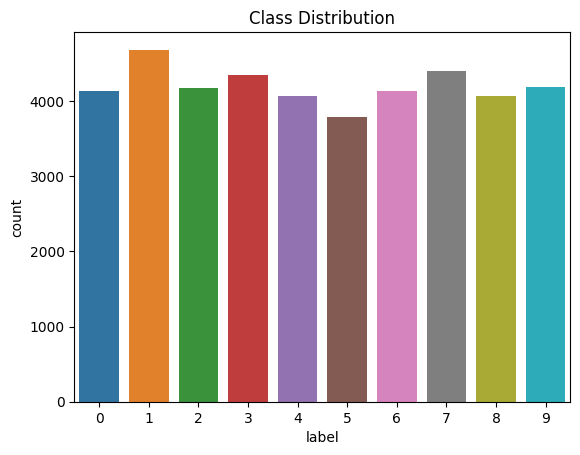

In [4]:
sns.countplot(x=ytrain)
plt.title('Class Distribution')
plt.show()

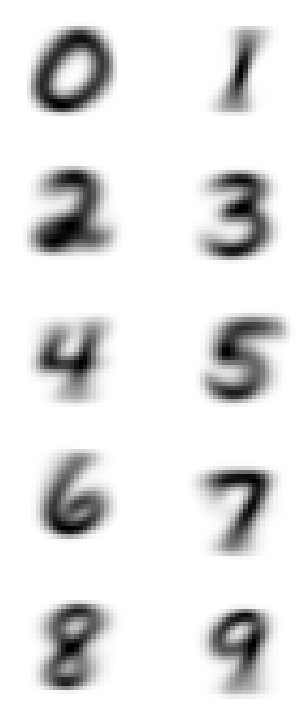

In [5]:
#数字の0、1、2、3、4、5、6、7、8、9の平均を計算して出力する
plt.figure(figsize=(4, 9))
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    ytrain_i = dftrain[dftrain['label'] == i]
    xtrain_i = ytrain_i.drop(labels = ["label"],axis = 1)

    #数字iの画像の平均を求める
    mxtrain_i = xtrain_i.mean()
    mxtrain_i = np.array(mxtrain_i)
    plt.subplot(5, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    sns.despine(top=True, right=True, left=True, bottom=True)
    plt.imshow(mxtrain_i.reshape(28,28), cmap=plt.cm.binary)

plt.show()

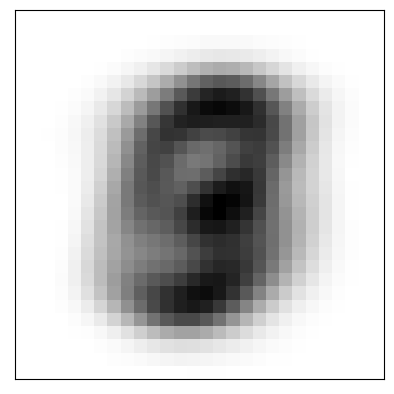

In [6]:
mxtrain = xtrain.mean()
mxtrain = np.array(mxtrain)
plt.xticks([])
plt.yticks([])
plt.imshow(mxtrain.reshape(28,28), cmap=plt.cm.binary)
plt.show()

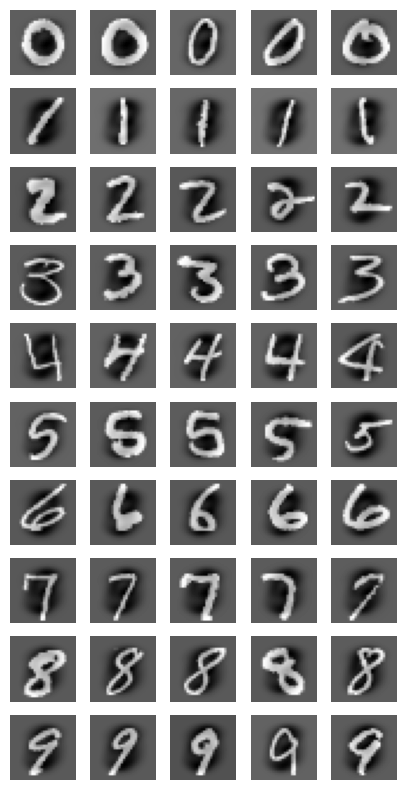

In [7]:
fig = plt.figure(figsize=(5, 10))
k=1
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    ytrain_i = dftrain[dftrain['label'] == i]
    xtrain_i = ytrain_i.drop(labels = ["label"],axis = 1)

    #5つのiの画像と全画像の平均の差を求める
    xtrain_i = xtrain_i.to_numpy()
    for j in range(5):
        diff_j = mxtrain - xtrain_i[j]
        fig.add_subplot(10, 5, k)
        plt.xticks([])
        plt.yticks([])
        sns.despine(top=True, right=True, left=True, bottom=True)
        plt.imshow(diff_j.reshape(28,28), cmap=plt.cm.binary)
        k += 1
plt.show()

In [8]:
#トレーニングデータ、テストデータの作成
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

ytrain = to_categorical(ytrain, num_classes = 10)
xtrain = xtrain.values.reshape(-1,28,28,1)

X_train, X_val, Y_train, Y_val = train_test_split(xtrain, ytrain, test_size = 0.15, random_state=2)

In [9]:
# Seqentialモデルを作ってみる
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

lr=0.001

In [10]:
#RMSpropで最適化
from tensorflow import keras
from keras import optimizers

opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=30, batch_size=32, verbose=1)

Epoch 1/30


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 182s 215ms/step - loss: 0.3368 - accuracy: 0.9393 - val_loss: 0.0836 - val_accuracy: 0.9731
Epoch 2/30
837/837 [==============================] - 172s 206ms/step - loss: 0.0824 - accuracy: 0.9780 - val_loss: 0.0748 - val_accuracy: 0.9805
Epoch 3/30
837/837 [==============================] - 164s 196ms/step - loss: 0.0674 - accuracy: 0.9834 - val_loss: 0.0707 - val_accuracy: 0.9812
Epoch 4/30
837/837 [==============================] - 165s 197ms/step - loss: 0.0599 - accuracy: 0.9858 - val_loss: 0.0907 - val_accuracy: 0.9816
Epoch 5/30
837/837 [==============================] - 164s 196ms/step - loss: 0.0547 - accuracy: 0.9869 - val_loss: 0.0795 - val_accuracy: 0.9821
Epoch 6/30
837/837 [==============================] - 162s 193ms/step - loss: 0.0548 - accuracy: 0.9886 - val_loss: 0.0857 - val_accuracy: 0.9817
Epoch 7/30
837/837 [==============================] - 165s 197ms/step - loss: 0.0520 - accuracy: 0.9892 - val_loss: 0.1707 - val_accura

1/1 [==============================] - 0s 47ms/step


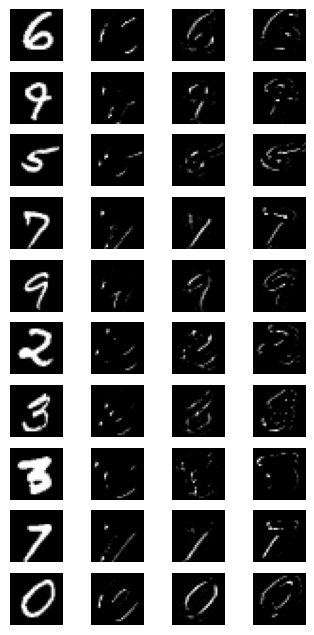

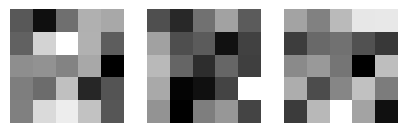

In [11]:
#学習済みモデルの1層目だけ取得してモデルを作成する
model_2 = Sequential()
model_2.add(model.layers[0])

fig = plt.figure(figsize=(4,8))
for i in range(10):
    ax = fig.add_subplot(10, 4, 4*i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(X_val[i][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 1], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
    ax = fig.add_subplot(10, 4, 4*i+4)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 2], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

#一層目で使われたカーネルフィルタも3つ抽出する
fig = plt.figure(figsize = (5,2))
for i in range(3):
    w = model_2.get_weights()[0][:, :, 0, i].reshape(5, 5)
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(w, cmap='gray_r')
plt.show()

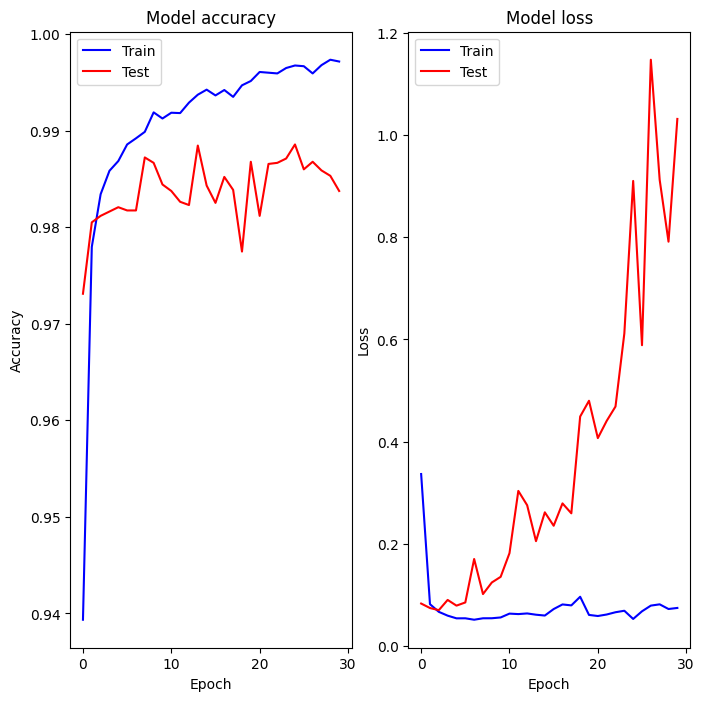

In [12]:
fig = plt.figure(figsize=(8, 8))
#制度
fig.add_subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, color='b', label="Training accuracy")
plt.plot(val_acc, color='r',label="Validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#損失
fig.add_subplot(1, 2, 2)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss, color='b', label="Training loss")
plt.plot(val_loss, color='r', label="validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(history)

197/197 [==============================] - 8s 37ms/step


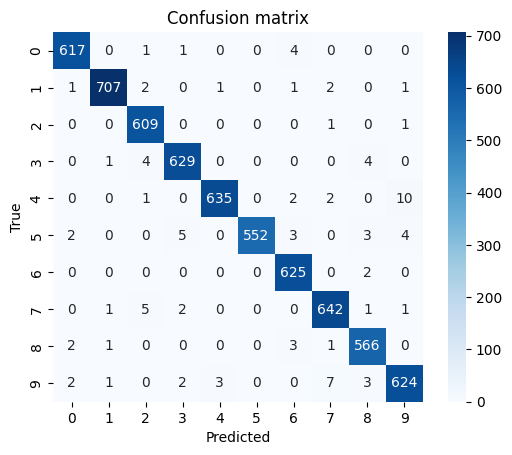

In [13]:
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

[6 9 5 ... 0 3 4]
[6 9 5 ... 0 3 4]
(6300,)
(6300,)


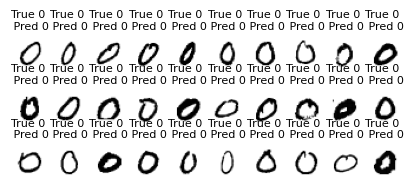

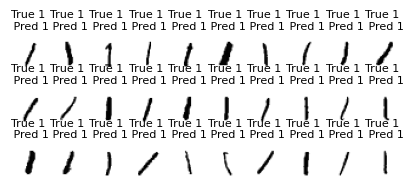

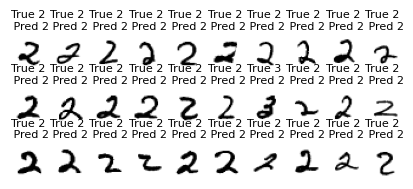

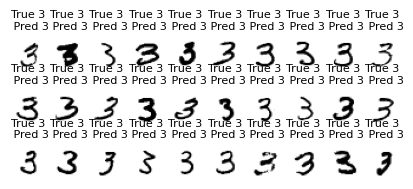

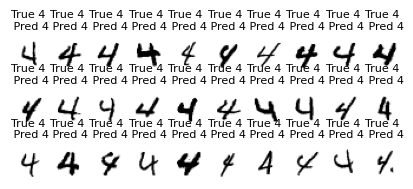

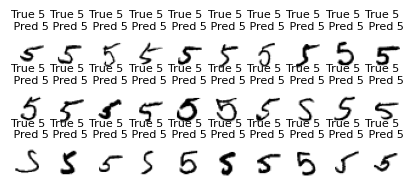

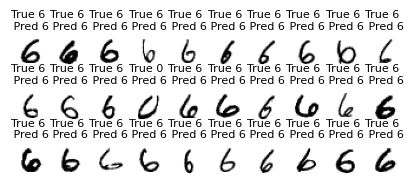

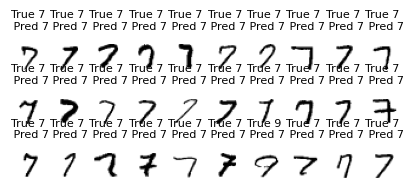

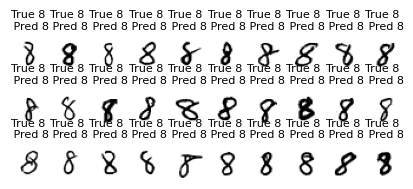

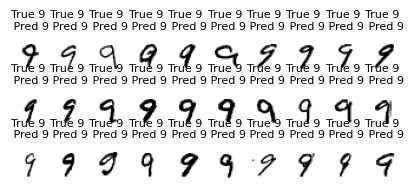

In [14]:
X_val2 = X_val.reshape(X_val.shape[0], 28, 28)
print(Y_pred_classes)
print(Y_true)
print(Y_pred_classes.shape)
print(Y_true.shape)

for t in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    fig = plt.figure(figsize=(5, 2))
    h = 0
    k = 0
    while h < 30:
        if Y_pred_classes[k] == t:
            fig.add_subplot(3, 10, h+1)
            plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
            plt.xticks([])
            plt.yticks([])
            sns.despine(top=True, right=True, left=True, bottom=True)
            plt.imshow(X_val2[k], cmap='binary')
            k += 1
            h += 1
        else:
            k += 1
    plt.show()

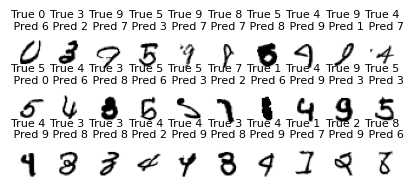

In [15]:
fig = plt.figure(figsize=(5, 2))
h = 0
k = 0
while h < 30:
    if Y_pred_classes[k] != Y_true[k]:
        fig.add_subplot(3, 10, h+1)
        plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(top=True, right=True, left=True, bottom=True)
        plt.imshow(X_val2[k], cmap='binary')
        k += 1
        h += 1
    else:
        k += 1
plt.show()

lr=1e-5

In [16]:
#RMSpropで最適化
from tensorflow import keras
from keras import optimizers

opt = keras.optimizers.RMSprop(lr=1e-5, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=30, batch_size=32, verbose=1)

Epoch 1/30


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 182s 215ms/step - loss: 0.0647 - accuracy: 0.9972 - val_loss: 0.9430 - val_accuracy: 0.9854
Epoch 2/30
837/837 [==============================] - 194s 231ms/step - loss: 0.0399 - accuracy: 0.9983 - val_loss: 0.9065 - val_accuracy: 0.9860
Epoch 3/30
837/837 [==============================] - 186s 222ms/step - loss: 0.0274 - accuracy: 0.9988 - val_loss: 0.8848 - val_accuracy: 0.9864
Epoch 4/30
837/837 [==============================] - 183s 219ms/step - loss: 0.0191 - accuracy: 0.9991 - val_loss: 0.8716 - val_accuracy: 0.9870
Epoch 5/30
837/837 [==============================] - 294s 352ms/step - loss: 0.0142 - accuracy: 0.9995 - val_loss: 0.8593 - val_accuracy: 0.9872
Epoch 6/30
837/837 [==============================] - 308s 368ms/step - loss: 0.0118 - accuracy: 0.9996 - val_loss: 0.8522 - val_accuracy: 0.9872
Epoch 7/30
837/837 [==============================] - 301s 360ms/step - loss: 0.0102 - accuracy: 0.9996 - val_loss: 0.8458 - val_accura

1/1 [==============================] - 0s 37ms/step


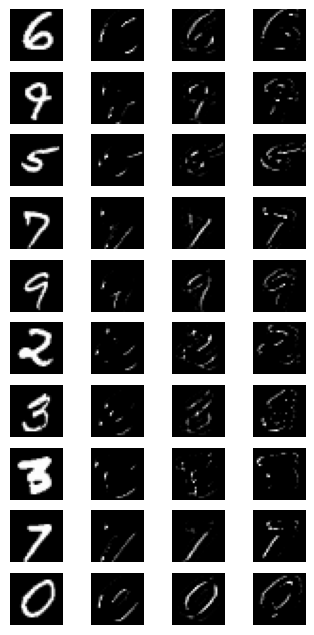

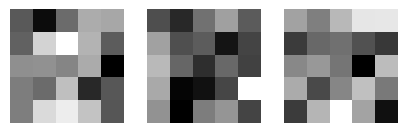

In [17]:
#学習済みモデルの1層目だけ取得してモデルを作成する
model_2 = Sequential()
model_2.add(model.layers[0])

fig = plt.figure(figsize=(4,8))
for i in range(10):
    ax = fig.add_subplot(10, 4, 4*i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(X_val[i][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 1], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
    ax = fig.add_subplot(10, 4, 4*i+4)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 2], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

#一層目で使われたカーネルフィルタも3つ抽出する
fig = plt.figure(figsize = (5,2))
for i in range(3):
    w = model_2.get_weights()[0][:, :, 0, i].reshape(5, 5)
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(w, cmap='gray_r')
plt.show()

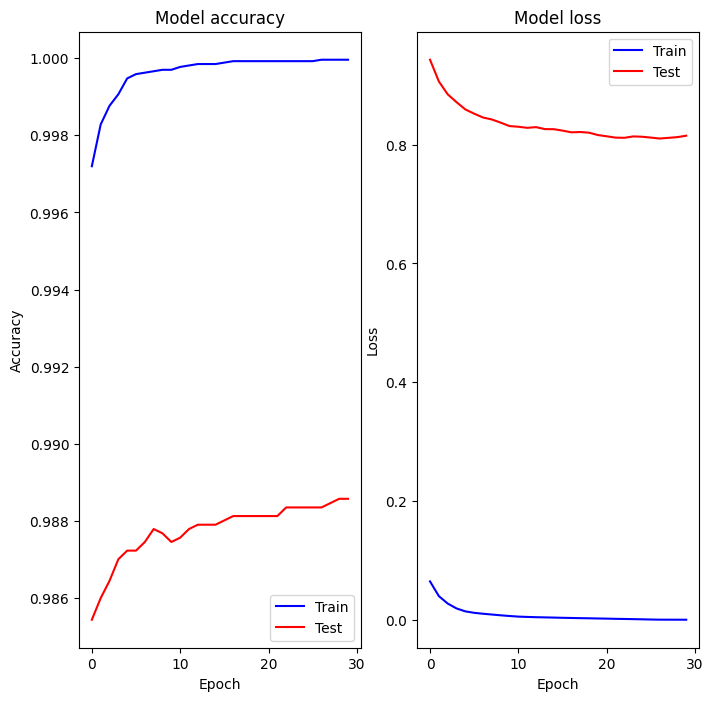

In [18]:
fig = plt.figure(figsize=(8, 8))
#制度
fig.add_subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, color='b', label="Training accuracy")
plt.plot(val_acc, color='r',label="Validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#損失
fig.add_subplot(1, 2, 2)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss, color='b', label="Training loss")
plt.plot(val_loss, color='r', label="validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(history)

197/197 [==============================] - 7s 32ms/step


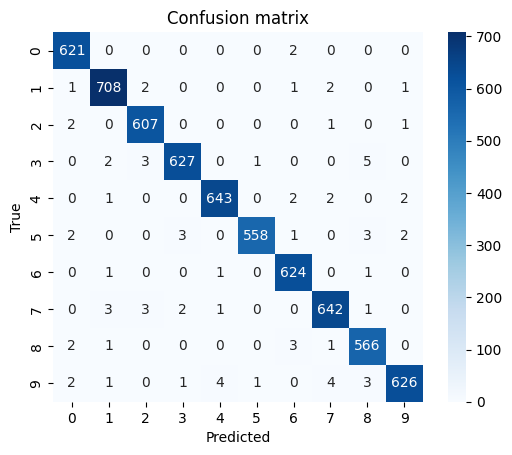

In [19]:
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

[6 9 5 ... 0 3 4]
[6 9 5 ... 0 3 4]
(6300,)
(6300,)


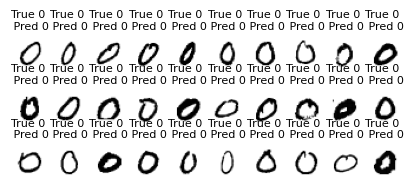

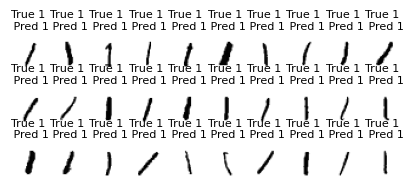

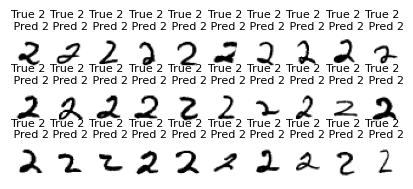

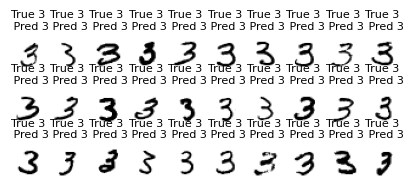

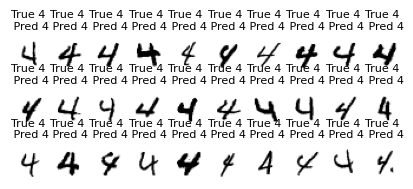

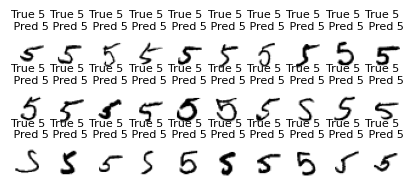

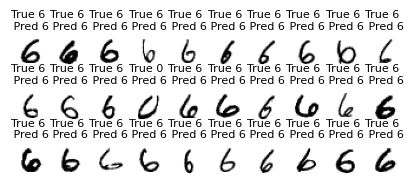

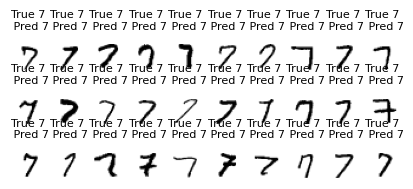

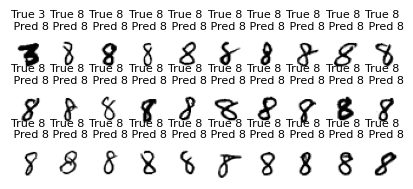

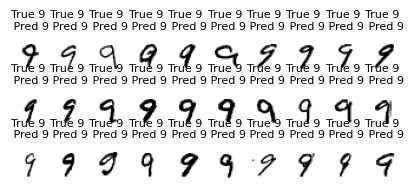

In [20]:
X_val2 = X_val.reshape(X_val.shape[0], 28, 28)
print(Y_pred_classes)
print(Y_true)
print(Y_pred_classes.shape)
print(Y_true.shape)

for t in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    fig = plt.figure(figsize=(5, 2))
    h = 0
    k = 0
    while h < 30:
        if Y_pred_classes[k] == t:
            fig.add_subplot(3, 10, h+1)
            plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
            plt.xticks([])
            plt.yticks([])
            sns.despine(top=True, right=True, left=True, bottom=True)
            plt.imshow(X_val2[k], cmap='binary')
            k += 1
            h += 1
        else:
            k += 1
    plt.show()

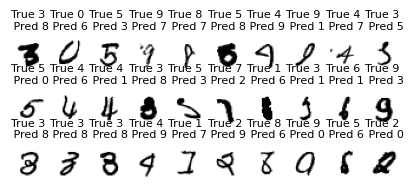

In [21]:
fig = plt.figure(figsize=(5, 2))
h = 0
k = 0
while h < 30:
    if Y_pred_classes[k] != Y_true[k]:
        fig.add_subplot(3, 10, h+1)
        plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(top=True, right=True, left=True, bottom=True)
        plt.imshow(X_val2[k], cmap='binary')
        k += 1
        h += 1
    else:
        k += 1
plt.show()

lr=1e-7

In [22]:
#RMSpropで最適化
from tensorflow import keras
from keras import optimizers

opt = keras.optimizers.RMSprop(lr=1e-7, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=30, batch_size=32, verbose=1)

Epoch 1/30


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 154s 183ms/step - loss: 1.3479e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 2/30
837/837 [==============================] - 154s 184ms/step - loss: 1.3447e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 3/30
837/837 [==============================] - 154s 184ms/step - loss: 1.3411e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 4/30
837/837 [==============================] - 162s 193ms/step - loss: 1.3384e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 5/30
837/837 [==============================] - 162s 193ms/step - loss: 1.3365e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 6/30
837/837 [==============================] - 168s 201ms/step - loss: 1.3332e-04 - accuracy: 1.0000 - val_loss: 0.8152 - val_accuracy: 0.9886
Epoch 7/30
837/837 [==============================] - 166s 198ms/step - loss: 1.3296e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 32ms/step


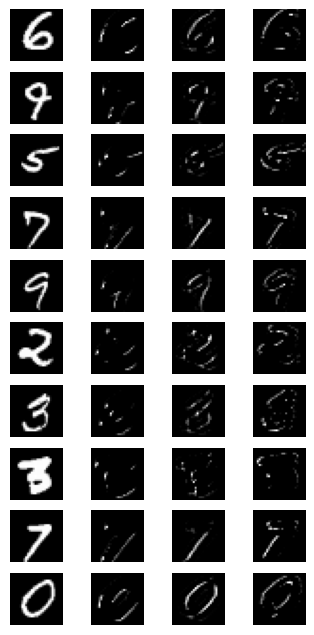

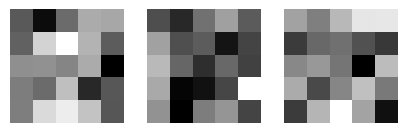

In [23]:
#学習済みモデルの1層目だけ取得してモデルを作成する
model_2 = Sequential()
model_2.add(model.layers[0])

fig = plt.figure(figsize=(4,8))
for i in range(10):
    ax = fig.add_subplot(10, 4, 4*i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(X_val[i][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 0], cmap='gray')
    ax = fig.add_subplot(10, 4, 4*i+3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 1], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
    ax = fig.add_subplot(10, 4, 4*i+4)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(model_2.predict(X_val[i:i+1])[0][:, :, 2], cmap='gray')
    sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

#一層目で使われたカーネルフィルタも3つ抽出する
fig = plt.figure(figsize = (5,2))
for i in range(3):
    w = model_2.get_weights()[0][:, :, 0, i].reshape(5, 5)
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    ax.imshow(w, cmap='gray_r')
plt.show()

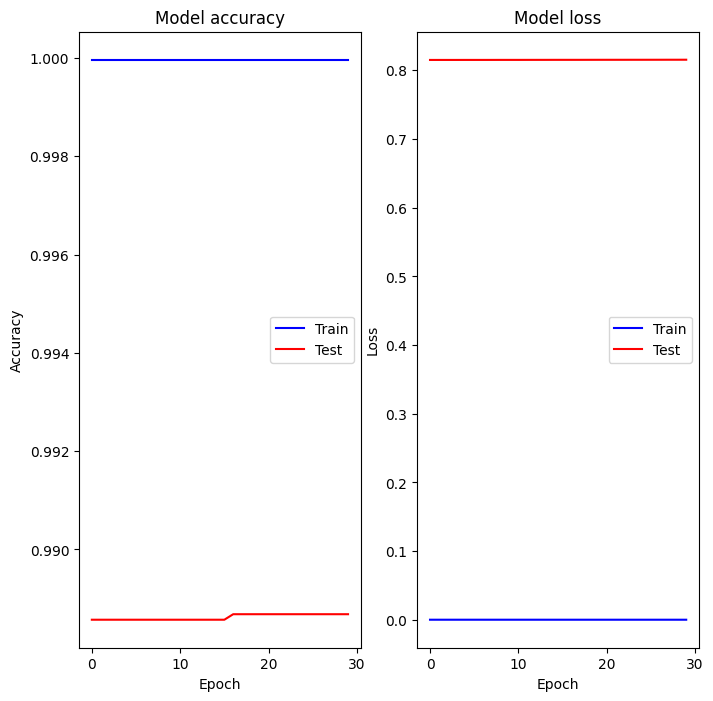

In [24]:
fig = plt.figure(figsize=(8, 8))
#制度
fig.add_subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, color='b', label="Training accuracy")
plt.plot(val_acc, color='r',label="Validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#損失
fig.add_subplot(1, 2, 2)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss, color='b', label="Training loss")
plt.plot(val_loss, color='r', label="validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(history)

197/197 [==============================] - 7s 33ms/step


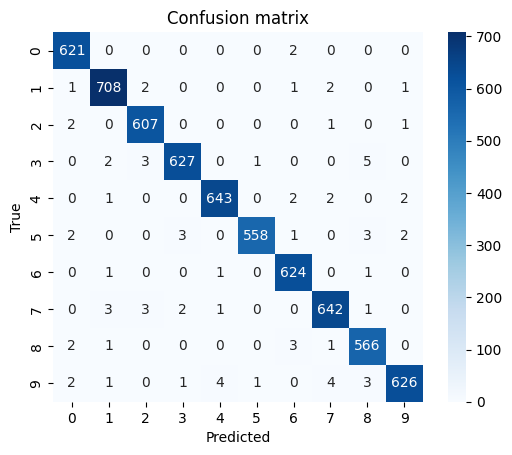

In [25]:
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

[6 9 5 ... 0 3 4]
[6 9 5 ... 0 3 4]
(6300,)
(6300,)


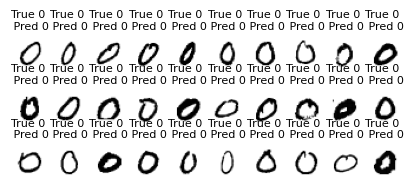

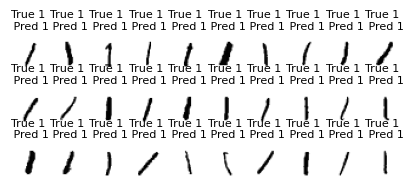

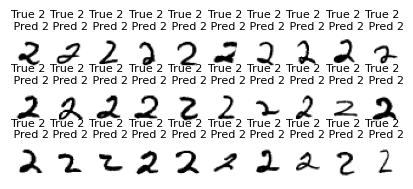

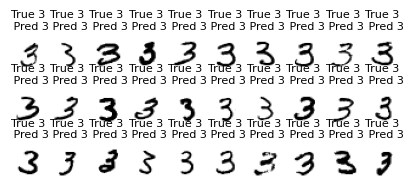

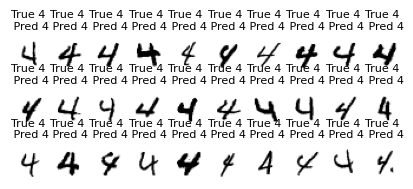

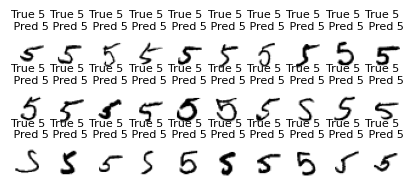

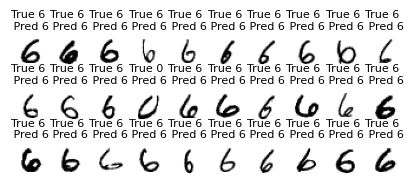

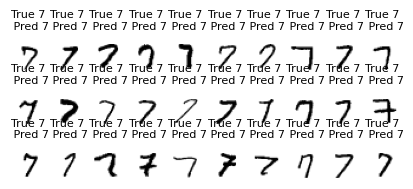

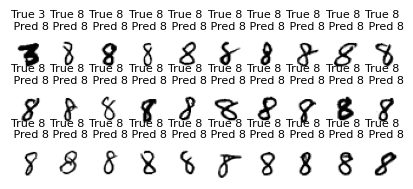

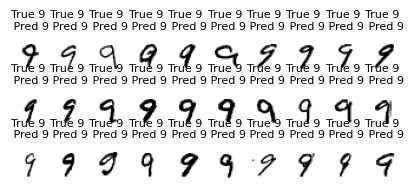

In [26]:
X_val2 = X_val.reshape(X_val.shape[0], 28, 28)
print(Y_pred_classes)
print(Y_true)
print(Y_pred_classes.shape)
print(Y_true.shape)

for t in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    fig = plt.figure(figsize=(5, 2))
    h = 0
    k = 0
    while h < 30:
        if Y_pred_classes[k] == t:
            fig.add_subplot(3, 10, h+1)
            plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
            plt.xticks([])
            plt.yticks([])
            sns.despine(top=True, right=True, left=True, bottom=True)
            plt.imshow(X_val2[k], cmap='binary')
            k += 1
            h += 1
        else:
            k += 1
    plt.show()

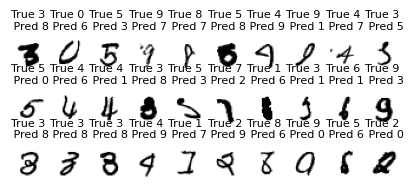

In [27]:
fig = plt.figure(figsize=(5, 2))
h = 0
k = 0
while h < 30:
    if Y_pred_classes[k] != Y_true[k]:
        fig.add_subplot(3, 10, h+1)
        plt.title(f"True {Y_true[k]} \n Pred {Y_pred_classes[k]}", fontsize = 8)
        plt.xticks([])
        plt.yticks([])
        sns.despine(top=True, right=True, left=True, bottom=True)
        plt.imshow(X_val2[k], cmap='binary')
        k += 1
        h += 1
    else:
        k += 1
plt.show()

Seqentialモデルを作ってみるパート2

In [28]:
model2 = Sequential()

model2.add(Conv2D(filters = 20, kernel_size = (5, 5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters = 50, kernel_size = (5, 5), padding = 'Same', activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(500,kernel_size =  (4, 4),padding = 'Same', activation ='relu'))
model2.add(Conv2D(10,kernel_size =  (1, 1),padding = 'Same', activation ='relu'))
model2.add(Flatten())
model2.add(Dense(500, activation = "relu"))
model2.add(Dense(10, activation = "softmax"))

lr=1e-3

In [29]:
#RMSpropで最適化
opt = keras.optimizers.RMSprop(lr=1e-3, rho=0.9, epsilon=1e-08, decay=0.0)
model2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(X_train, Y_train, validation_split=0.25, epochs=3, batch_size=32, verbose=1)

Epoch 1/3


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 135s 160ms/step - loss: 0.5163 - accuracy: 0.8916 - val_loss: 0.1221 - val_accuracy: 0.9622
Epoch 2/3
837/837 [==============================] - 126s 151ms/step - loss: 0.1012 - accuracy: 0.9714 - val_loss: 0.0931 - val_accuracy: 0.9751
Epoch 3/3
837/837 [==============================] - 109s 130ms/step - loss: 0.0800 - accuracy: 0.9780 - val_loss: 0.1582 - val_accuracy: 0.9699


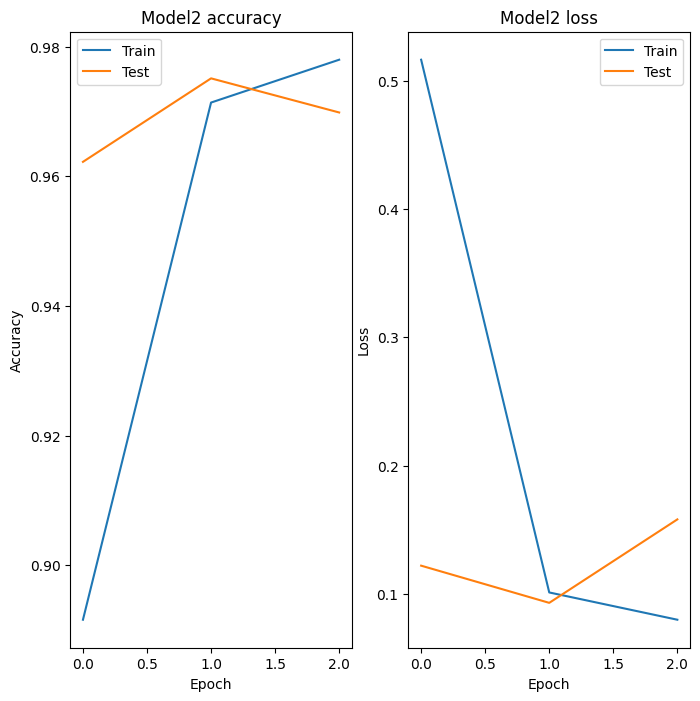

197/197 [==============================] - 6s 30ms/step


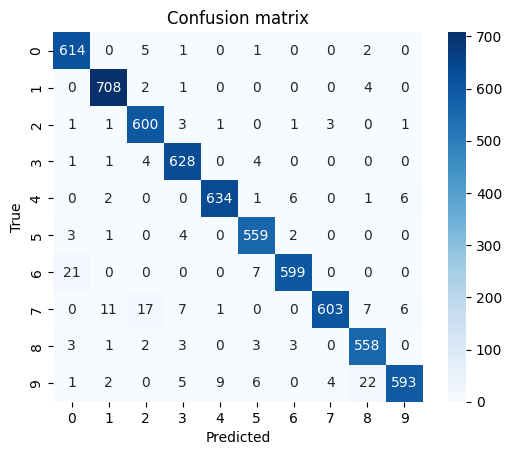

In [32]:
fig = plt.figure(figsize=(8, 8))
#ヒストリーの可視化（正確）
fig.add_subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc,label="Validation accuracy")
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#ヒストリーの可視化（損失）
fig.add_subplot(1, 2, 2)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss, label="Training loss")
plt.plot(val_loss, label="validation loss")
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#ヒートマップで確認
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model2.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

lr=1e-5

In [33]:
#RMSpropで最適化
opt = keras.optimizers.RMSprop(lr=1e-3, rho=0.9, epsilon=1e-08, decay=0.0)
model2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(X_train, Y_train, validation_split=0.25, epochs=3, batch_size=32, verbose=1)

Epoch 1/3


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 106s 125ms/step - loss: 0.0764 - accuracy: 0.9808 - val_loss: 0.0794 - val_accuracy: 0.9821
Epoch 2/3
837/837 [==============================] - 108s 129ms/step - loss: 0.0705 - accuracy: 0.9842 - val_loss: 0.1564 - val_accuracy: 0.9768
Epoch 3/3
837/837 [==============================] - 106s 127ms/step - loss: 0.0602 - accuracy: 0.9868 - val_loss: 0.1064 - val_accuracy: 0.9820


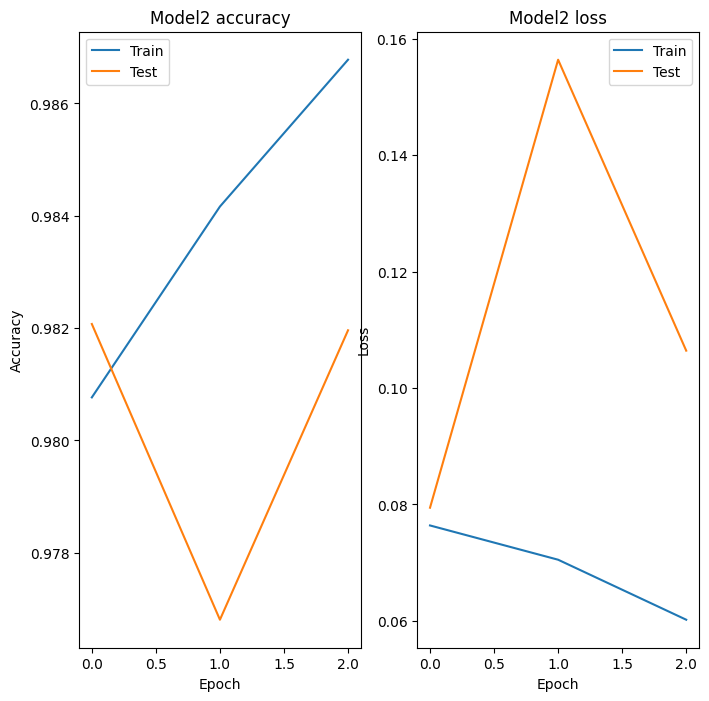

197/197 [==============================] - 6s 27ms/step


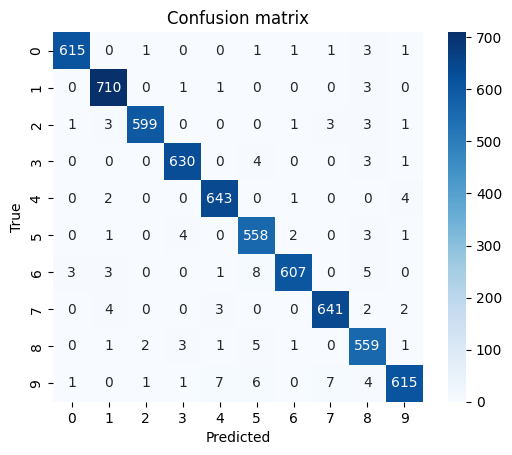

In [34]:
fig = plt.figure(figsize=(8, 8))
#ヒストリーの可視化（正確）
fig.add_subplot(1, 2, 1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc,label="Validation accuracy")
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#ヒストリーの可視化（損失）
fig.add_subplot(1, 2, 2)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(loss, label="Training loss")
plt.plot(val_loss, label="validation loss")
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#ヒートマップで確認
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model2.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

lr=1e-7

In [37]:
#RMSpropで最適化
opt = keras.optimizers.RMSprop(lr=1e-3, rho=0.9, epsilon=1e-08, decay=0.0)
model2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
history2 = model2.fit(X_train, Y_train, validation_split=0.25, epochs=3, batch_size=32, verbose=1)

Epoch 1/3


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


837/837 [==============================] - 111s 129ms/step - loss: 0.0665 - accuracy: 0.9879 - val_loss: 0.1125 - val_accuracy: 0.9831
Epoch 2/3
837/837 [==============================] - 104s 124ms/step - loss: 0.0520 - accuracy: 0.9902 - val_loss: 0.1527 - val_accuracy: 0.9835
Epoch 3/3
837/837 [==============================] - 111s 132ms/step - loss: 0.0552 - accuracy: 0.9903 - val_loss: 0.1408 - val_accuracy: 0.9775


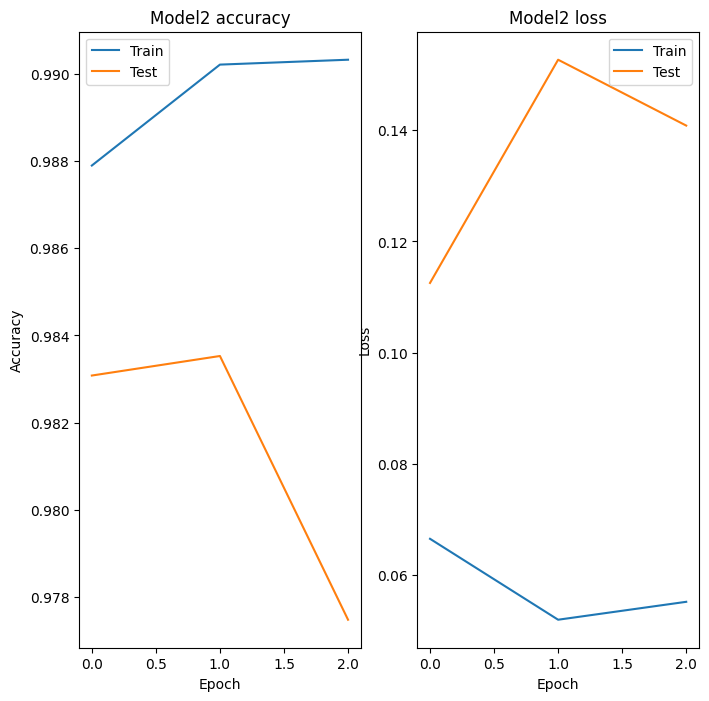

197/197 [==============================] - 5s 26ms/step


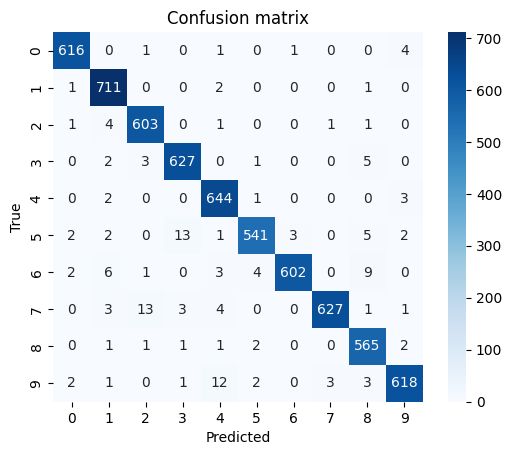

In [39]:
fig = plt.figure(figsize=(8, 8))
#ヒストリーの可視化（正確）
fig.add_subplot(1, 2, 1)
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc,label="Validation accuracy")
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

#ヒストリーの可視化（損失）
fig.add_subplot(1, 2, 2)
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
plt.plot(loss, label="Training loss")
plt.plot(val_loss, label="validation loss")
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#ヒートマップで確認
from sklearn.metrics import confusion_matrix
from decimal import Decimal
Y_pred = model2.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()